In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
#Generate Data
m = 100

X1 = np.random.rand(m, 1) * 1000
X2 = np.random.rand(m, 1) * 1

X = np.hstack([X1, X2])
y = 5 * X1 + 2 * X2 + 10 + np.random.randn(m, 1) * 50

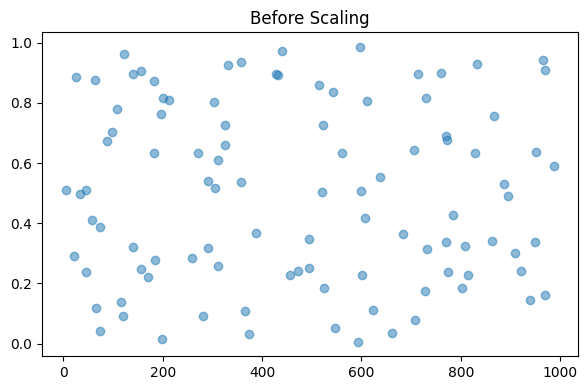

In [3]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.title("Before Scaling")
plt.tight_layout()
plt.show()

In [4]:
#Add Bias
X_b = np.c_[np.ones((m, 1)), X_scaled]

In [5]:
#Cost & Gradient Descent
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X @ theta - y)**2)

def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

theta = np.zeros((3,1))
theta, cost_history_scaled = gradient_descent(X_b, y, theta, lr=0.1, iterations=100)

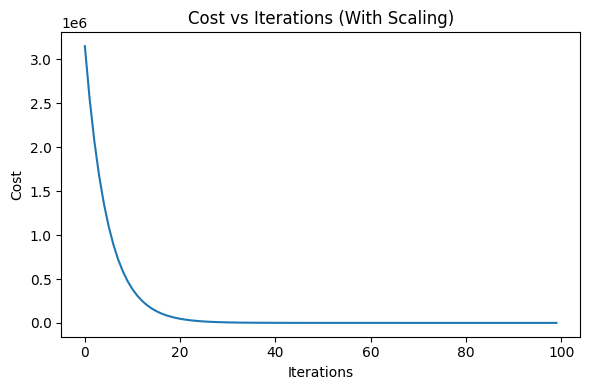

In [6]:
#Plot Cost Curve (With Scaling)
plt.figure(figsize=(6,4))
plt.plot(cost_history_scaled)
plt.title("Cost vs Iterations (With Scaling)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.tight_layout()
plt.show()